C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

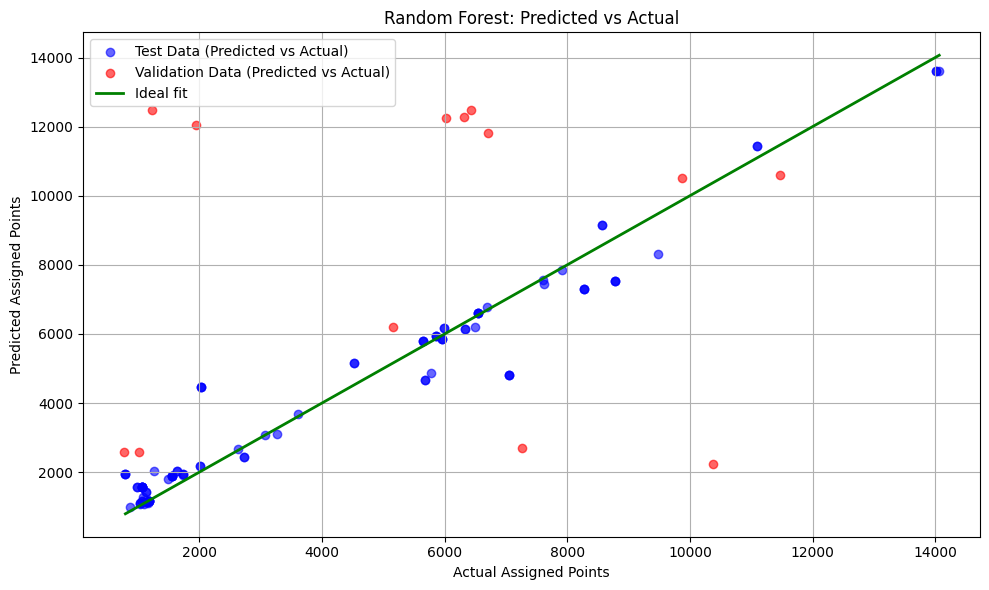

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
TrainDtCsvDir = r'C:\Users\Sir\Desktop\HEA Pred\previous data\A physics-based machine-learning approach for modeling the temperature-dependent yield strengths of medium- or high-entropy alloys\TBreak Model\Tbreak_None_Removed_Updated.csv'
ValDtCsvDir = r'C:\Users\Sir\Desktop\HEA Pred\previous data\A physics-based machine-learning approach for modeling the temperature-dependent yield strengths of medium- or high-entropy alloys\TBreak Model\ValidationData\Val_Tbreak_Yield_0Added.csv'

TrainDf = pd.read_csv(TrainDtCsvDir)
ValDf = pd.read_csv(ValDtCsvDir)

# Define the features and target
features = [
    # Add elemental composition as features
    'Al', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Ta', 'Ti', 'V', 'Zr', 'Nb', 'Mo', 'Zn', 'W', 'Sn', 'Nd', 'Hf', 'Si'
]

# Train: Extract features and target from the training dataset (TrainDf)
X_train = TrainDf[features]
y_train = TrainDf['Assigned Point']

# Validation: Ensure the correct columns and types for validation data (ValDf)
X_val = ValDf[features]
y_val_actual = ValDf['Assigned Point']

# Train-Test Split on the training data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=20)

# Model 1: Random Forest
forest_model = RandomForestRegressor(random_state=42, n_estimators=70, max_depth=7, min_samples_split=5, min_samples_leaf=2)
forest_model.fit(X_train_split, y_train_split)
y_pred_forest_test = forest_model.predict(X_test_split)
y_pred_forest_val = forest_model.predict(X_val)

# Model 2: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_split, y_train_split)
y_pred_linear_test = linear_model.predict(X_test_split)
y_pred_linear_val = linear_model.predict(X_val)

# Plot Predicted vs Actual for Random Forest
plt.figure(figsize=(10, 6))

# Subplot for Random Forest
plt.scatter(y_test_split, y_pred_forest_test, alpha=0.6, color='b', label='Test Data (Predicted vs Actual)')
plt.scatter(y_val_actual, y_pred_forest_val, alpha=0.6, color='r', label='Validation Data (Predicted vs Actual)')
plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)], color='green', lw=2, label='Ideal fit')
plt.xlabel('Actual Assigned Points')
plt.ylabel('Predicted Assigned Points')
plt.title('Random Forest: Predicted vs Actual')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [12]:
y_pred_forest_val

array([4796.05458708, 7181.32481521, 5584.08390546, 5605.98768026,
       4122.89974692, 4532.06389645, 2408.21843664, 2822.15900144,
       2112.72682489, 1477.56328442, 2850.49758507, 2666.95683919,
       3998.11658586])

In [13]:
X_val

,Al,Cr,Mn,Fe,Co,Ni,Cu,Ta,Ti,V,Zr,Nb,Mo,Zn,W,Sn,Nd,Hf,Si
0,0.100200,0.00,0,0,0,0,0,0.134269,0.191383,0.000000,0.191383,0.191383,0.191383,0,0.00,0,0,0.000000,0.000000
1,0.200200,0.00,0,0,0,0,0,0.119119,0.170170,0.000000,0.170170,0.170170,0.170170,0,0.00,0,0,0.000000,0.000000
2,0.300030,0.00,0,0,0,0,0,0.104310,0.148915,0.000000,0.148915,0.148915,0.148915,0,0.00,0,0,0.000000,0.000000
3,0.458369,0.00,0,0,0,0,0,0.102400,0.146449,0.000000,0.146449,0.000000,0.146334,0,0.00,0,0,0.000000,0.000000
4,0.499950,0.00,0,0,0,0,0,0.074493,0.106389,0.000000,0.106389,0.106389,0.106389,0,0.00,0,0,0.000000,0.000000
5,0.200000,0.00,0,0,0,0,0,0.000000,0.200000,0.200000,0.200000,0.200000,0.000000,0,0.00,0,0,0.000000,0.000000
6,0.000000,0.25,0,0,0,0,0,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0,0.00,0,0,0.000000,0.000000
7,0.000000,0.00,0,0,0,0,0,0.000000,0.222222,0.222222,0.000000,0.222222,0.000000,0,0.00,0,0,0.222222,0.111111
8,0.000000,0.00,0,0,0,0,0,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,0,0.25,0,0,0.000000,0.000000
9,0.000000,0.00,0,0,0,0,0,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0,0.25,0,0,0.000000,0.000000


In [15]:
# Assuming best_model is a decision tree model
feature_importances = forest_model.feature_importances_

# Create a DataFrame to display feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
importance_df


,Feature,Importance
12,Mo,0.212581
7,Ta,0.209458
0,Al,0.150253
17,Hf,0.119580
9,V,0.076872
8,Ti,0.075503
10,Zr,0.042691
1,Cr,0.042006
11,Nb,0.031107
14,W,0.020453


C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Sir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

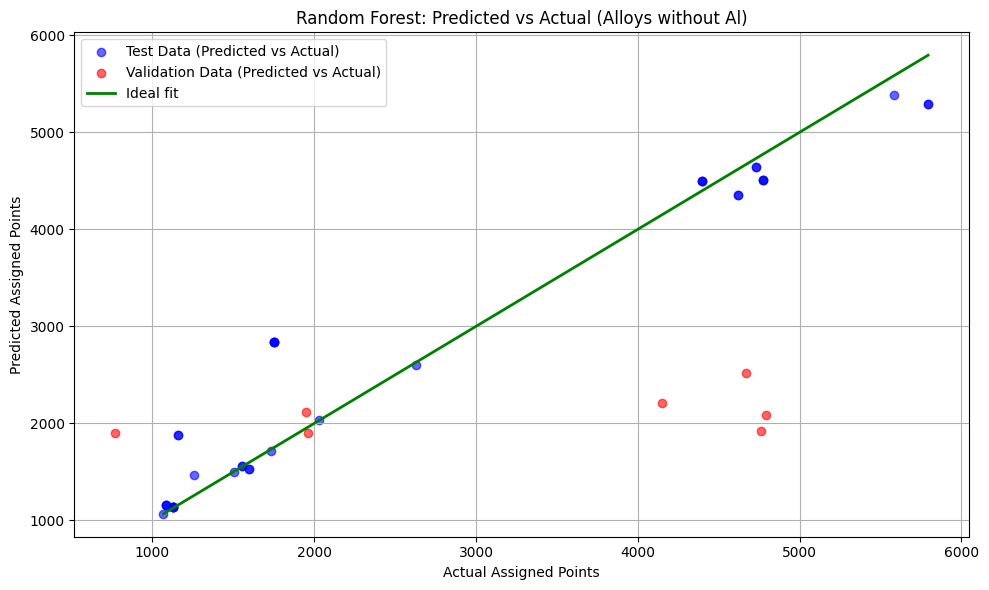

,Feature,Importance
1,Cr,0.316967
17,Hf,0.283259
11,Nb,0.156763
12,Mo,0.100787
7,Ta,0.065426
8,Ti,0.018314
9,V,0.017423
10,Zr,0.013819
14,W,0.008957
3,Fe,0.006936


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
TrainDtCsvDir = r'C:\Users\Sir\Desktop\HEA Pred\previous data\A physics-based machine-learning approach for modeling the temperature-dependent yield strengths of medium- or high-entropy alloys\TBreak Model\Tbreak_None_Removed_Updated.csv'
ValDtCsvDir = r'C:\Users\Sir\Desktop\HEA Pred\previous data\A physics-based machine-learning approach for modeling the temperature-dependent yield strengths of medium- or high-entropy alloys\TBreak Model\ValidationData\Val_Tbreak_Yield_0Added.csv'

TrainDf = pd.read_csv(TrainDtCsvDir)
ValDf = pd.read_csv(ValDtCsvDir)

# Remove all alloys containing Al (i.e., where 'Al' > 0)
TrainDf = TrainDf[TrainDf['Al'] == 0]
ValDf = ValDf[ValDf['Al'] == 0]

# Define the features and target
features = [

    # Add elemental composition as features
    'Al', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Ta', 'Ti', 'V', 'Zr', 'Nb', 'Mo', 'Zn', 'W', 'Sn', 'Nd', 'Hf', 'Si'
]

# Train: Extract features and target from the training dataset (TrainDf)
X_train = TrainDf[features]
y_train = TrainDf['Assigned Point']

# Validation: Ensure the correct columns and types for validation data (ValDf)
X_val = ValDf[features]
y_val_actual = ValDf['Assigned Point']

# Train-Test Split on the training data
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=20)

# Model 1: Random Forest
forest_model = RandomForestRegressor(random_state=42, n_estimators=70, max_depth=7, min_samples_split=5, min_samples_leaf=2)
forest_model.fit(X_train_split, y_train_split)
y_pred_forest_test = forest_model.predict(X_test_split)
y_pred_forest_val = forest_model.predict(X_val)

# Model 2: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_split, y_train_split)
y_pred_linear_test = linear_model.predict(X_test_split)
y_pred_linear_val = linear_model.predict(X_val)

# Plot Predicted vs Actual for Random Forest
plt.figure(figsize=(10, 6))

# Subplot for Random Forest
plt.scatter(y_test_split, y_pred_forest_test, alpha=0.6, color='b', label='Test Data (Predicted vs Actual)')
plt.scatter(y_val_actual, y_pred_forest_val, alpha=0.6, color='r', label='Validation Data (Predicted vs Actual)')
plt.plot([min(y_test_split), max(y_test_split)], [min(y_test_split), max(y_test_split)], color='green', lw=2, label='Ideal fit')
plt.xlabel('Actual Assigned Points')
plt.ylabel('Predicted Assigned Points')
plt.title('Random Forest: Predicted vs Actual (Alloys without Al)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Assuming best_model is a decision tree model
feature_importances = forest_model.feature_importances_

# Create a DataFrame to display feature names and their importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
importance_df


In [10]:
ValDf

,ID,Composition,Tbreak,YS at Tbreak,Al,Cr,Mn,Fe,Co,Ni,...,AVG Possion Ratio,Itinerate Electron,Cohesive Energy,Local Size Mismatch,Local Shear Modulus Mismatch,Local Electronegativity Mismatch,Avg Melting Pt,Assigned Point,Criteria Satisfied,Temp Range
6,6,Cr24.75Mo24.75Nb24.75V24.75C1,1817.305163,570.783459,0.0,0.25,0,0,0,0,...,0.322500,5.750000,6.830000,-0.028856,5.312500,-0.091875,2570.650000,4671.222458,3,4
7,7,HfNbTiVSi0.5,994.636993,1254.689815,0.0,0.00,0,0,0,0,...,0.364444,4.222222,5.907778,0.004444,-6.592593,-0.000741,2271.988887,4758.706438,3,3
8,8,MoTaVW,1454.295237,667.282023,0.0,0.00,0,0,0,0,...,0.325000,6.000000,6.577500,0.015250,-9.187500,-0.194375,3084.400000,4790.705352,3,4
9,9,NbMoTaW,1287.856542,572.517369,0.0,0.00,0,0,0,0,...,0.332500,6.250000,6.867500,0.022750,-4.937500,-0.196250,3226.150000,4150.443388,3,4
10,10,Ti0.42Hf0.21Nb0.21V0.16,769.996732,611.832210,0.0,0.00,0,0,0,0,...,0.372100,4.160000,5.798300,-0.028875,-8.223600,0.035154,2268.378500,769.996732,1,2
11,11,Ti37V15Nb22Hf23W3,1017.609778,629.570728,0.0,0.00,0,0,0,0,...,0.370200,4.220000,5.936900,-0.030634,-9.098600,0.028011,2337.965500,1961.965870,2,3
12,12,TiZrTa0.7NbMo,1950.609513,72.910811,0.0,0.00,0,0,0,0,...,0.350638,5.148936,5.814043,0.015025,1.439565,-0.116388,2597.830846,1950.609513,1,4
